In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv')

In [ ]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
slovarik = pd.Series(["T-shirt/top","Trouser", "Pullover", "Dress", "Coat",  "Sandal",
          "Shirt", "Sneaker", "Bag", "Ankle boot"], index = [0,1,2,3,4,5,6,7,8,9])

data["label"] = data["label"].map(slovarik)
print(data)


            label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0     T-shirt/top       0       0       0       0       0       0       0   
1         Trouser       0       0       0       0       0       0       0   
2        Pullover       0       0       0       0       0       0      14   
3        Pullover       0       0       0       0       0       0       0   
4           Dress       0       0       0       0       0       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
9995  T-shirt/top       0       0       0       0       0       0       0   
9996        Shirt       0       0       0       0       0       0       0   
9997          Bag       0       0       0       0       0       0       0   
9998          Bag       0       1       3       0       0       0       0   
9999      Trouser       0       0       0       0       0       0       0   

      pixel8  pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779

In [ ]:
D = data.drop(['label'],axis = 1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns = D.columns)
D

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.041284,0.032787,0.000,...,0.405512,0.345238,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,...,0.133858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.05668,0.243119,0.405738,0.068,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.129167,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.644,...,0.539370,0.500000,0.549020,0.000000,0.521569,0.878431,0.925000,0.248889,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.148,...,0.125984,0.091270,0.054902,0.078431,0.000000,0.000000,0.004167,0.000000,0.000000,0.0
9996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.116667,0.000000,0.000000,0.0
9997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,...,0.688976,0.682540,0.674510,0.713725,0.780392,0.870588,0.175000,0.000000,0.004878,0.0
9998,0.0,0.022222,0.013761,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0


In [ ]:
T = TSNE(n_components = 2, perplexity = 25, random_state = 123)

In [ ]:
TSNE_features = T.fit_transform(D)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
TSNE_features[1:4,:]

array([[ 81.02309  , -35.916107 ],
       [  5.5789356,   4.3217053],
       [ 22.128464 ,  25.547033 ]], dtype=float32)

In [ ]:
DATA = D.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]

In [ ]:
'''
%matplotlib
fig = plt.figure()
sns.scatterplot(x = 'x', y = 'y', hue = data['label'], data=DATA, palette = 'bright')
plt.show()
plt.savefig('TSNE.jpg')
'''

Using matplotlib backend: agg


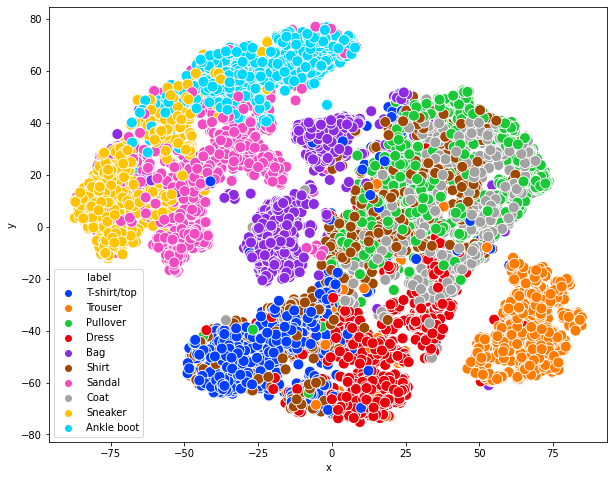

In [ ]:
#tsne_df = pd.DataFrame({'tsne_1': D[:,0], 'tsne_2': D[:,1]})

%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=DATA['x'], y=DATA['y'],
                hue=data.label, data=data,
                ax=ax, s=120, palette='bright')
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 9.4 MB/s 
     |████████████████████████████████| 18.2 MB 15.2 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=57af0751940aa8550d179e53f03102b89bb3715535fed0a4cc56354ae3ee2e5b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=f61a3fabcefdb6a54f6e4fbbac53d545b3dbf870ddf7a5574eee3f5602541408
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=93cad8dca76dbbcb16bd321dfb784ce5696fdef59d1c915119

In [ ]:
import umap.umap_ as umap
import umap.plot
# параметры n и m меняется
n = 50
m = 0.6
%time embedding = umap.UMAP(n_neighbors=n, min_dist=m, random_state=123).fit_transform(data.drop('label', axis=1)) 

CPU times: user 1min 22s, sys: 1.28 s, total: 1min 23s
Wall time: 1min 24s


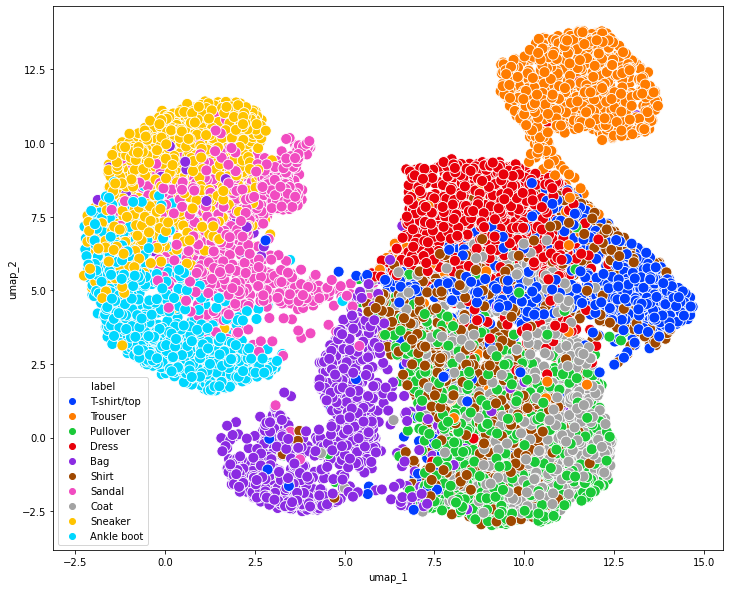

In [ ]:
umap_df = pd.DataFrame({'umap_1': embedding[:,0], 'umap_2': embedding[:,1]})
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=umap_df.umap_1, y=umap_df.umap_2, hue=data.label, data=data, ax=ax, s=120, palette='bright')
plt.show()

In [ ]:
import umap.umap_ as umap
import umap.plot 
um = dict()
for i in range(len(n_n)):
  for j in range(len(m_d)):
    um[(n_n[i],m_d[j])] = (umap.UMAP(n_neighbors = n_n[i], min_dist = m_d[j], random_state =123).fit_transform(DATA))
for i in range(len(n_n)):
  for j in range(len(m_d)):
    umap.plot.points(um, labels=y, theme="fire")


ModuleNotFoundError: ignored

In [ ]:
import umap.plot  # pip install umap-learn[plot]

umap.plot.points(manifold, labels=y, theme="fire")

In [ ]:
n_n = (5,25,50)
m_d = (0.1,0.6)

In [ ]:
from umap import UMAP
import plotly.express as px 
umap_2d = UMAP(n_components=2, init='random', random_state=123)

umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()